In [1]:
import numpy as np

import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils
mpl_stylesheet.banskt_presentation(splinecolor = 'black')

from mrashpen.utils import R_trendfilter
from mrashpen.inference.mrash_wrapR import MrASHR
from mrashpen.models.mixture_gaussian import emfit

from gradvi.inference import LinearRegression, Trendfiltering
from gradvi.normal_means import NormalMeans, NormalMeansFromPosterior
from gradvi.tests import toy_priors, toy_data
from gradvi.optimize import moving_average as gvma
from gradvi.models import basis_matrix as gvbm
from gradvi.models import TrendfilteringModel

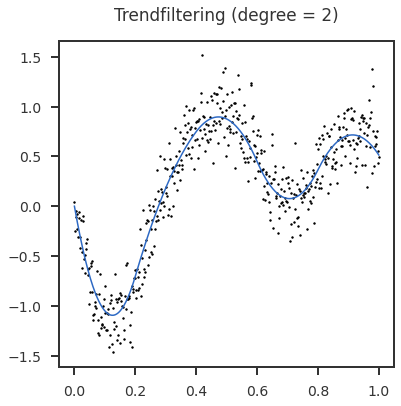

In [2]:
n = 512
x = np.linspace(0, 1, n)
np.random.seed(100)

degree = 2
nknots = 4
strue  = 0.2
knots  = np.linspace(0, 1, nknots+2)[1:-1]

data = toy_data.changepoint_from_bspline(x, knots, strue, degree = degree, 
                        signal = "normal", seed = 100,
                        include_intercept = False)

mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 72)
fig = plt.figure(figsize = (6, 6))

ax = fig.add_subplot(1, 1, 1)
ax.scatter(data.x, data.y, s = 2, color = 'black')
ax.plot(data.x, data.ytrue)
ax.set_title(f"Trendfiltering (degree = {degree})", pad = 20)

plt.show()

In [3]:
s2_true = np.var(data.y - data.ytrue)

H = gvbm.trendfiltering(n, degree)
Hinv = gvbm.trendfiltering_inverse(n, degree)

In [4]:
Ddoty = np.zeros_like(data.y)
Ddoty[degree + 1:] = np.diff(data.y, n = degree + 1)
for i in range(degree + 1):
    Ddoty[i] = np.diff(data.y[:i+1], n = i)

In [5]:
np.allclose(Ddoty,np.dot(Hinv, data.y))

True

In [11]:
Hinv.T[2,:]

array([ 0.,  0.,  1., -3.,  3., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [8]:
np.dot(Hinv.T, data.y)

array([ 2.36222971e-01,  3.89827219e-02, -5.52748922e-01,  7.03633583e-01,
       -8.66229935e-01,  7.92753810e-01, -1.82312541e-01, -1.96653680e-01,
       -3.27523916e-01,  1.00335273e+00, -7.63313411e-01, -5.25959369e-01,
        1.24643178e+00, -2.19713713e-01, -5.83807108e-01, -8.29166626e-02,
        3.78380389e-01,  1.36850890e-01, -3.59056601e-01,  6.30997521e-01,
       -8.77611645e-01,  4.56979748e-01,  3.23429943e-01, -8.36964298e-01,
        2.93307933e-01,  5.04951439e-01, -9.96866253e-02, -7.98468665e-01,
        1.47555383e+00, -1.54805303e+00,  6.84942023e-01, -1.54856812e-01,
        2.75151749e-01, -3.22189361e-01,  4.18991695e-01, -7.65735942e-01,
        1.49569412e+00, -1.74563195e+00,  6.38319379e-01,  7.80587287e-01,
       -1.67345655e+00,  2.15968049e+00, -1.80800534e+00,  8.65114848e-01,
       -3.06197027e-01, -6.44536540e-02,  2.72506349e-01,  2.46226670e-01,
       -1.05014342e+00,  1.38450242e+00, -7.91947766e-01, -5.98185148e-02,
       -1.48901840e-02,  

In [12]:
data.y[0] - data.y[1] + data.y[2] - data.y[3]

0.23622297120664917